In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


df = pd.read_csv('.\Iris Dataset.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:

def label_encoder(column):
    labels = column.unique()
    label_dict = {label: i for i, label in enumerate(labels)}
    encoded_column = column.map(label_dict)
    return encoded_column


df['Species'] = label_encoder(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


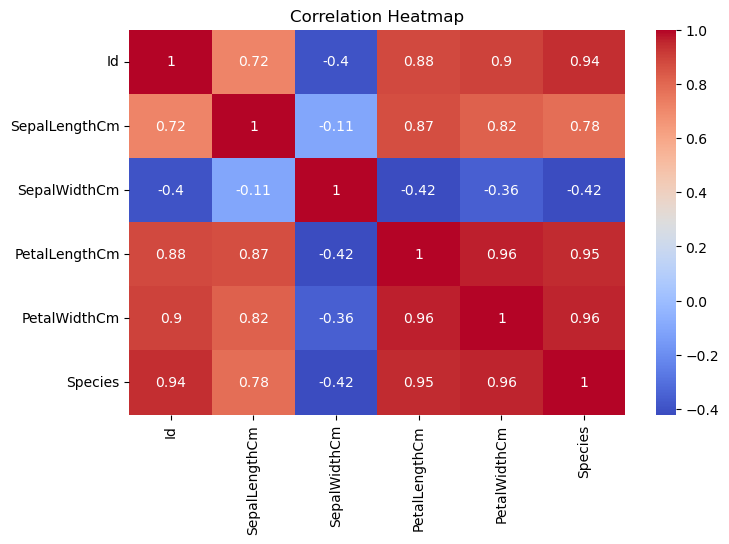

In [3]:


plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

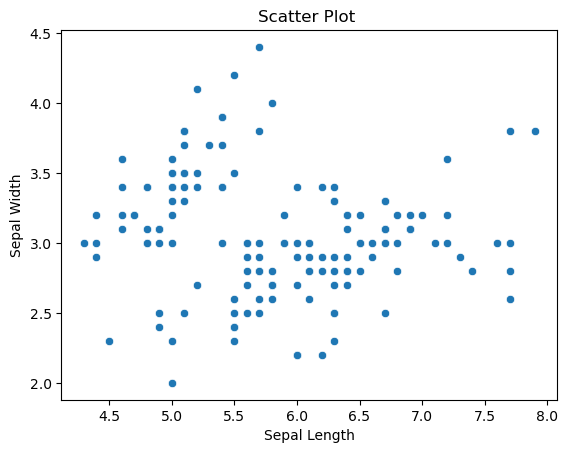

In [4]:

y = df['Species']



sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot ')
plt.show()

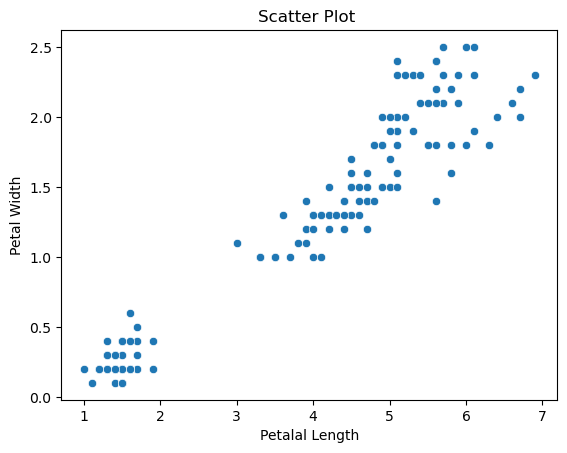

In [5]:



sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df)
plt.xlabel('Petalal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot ')
plt.show()

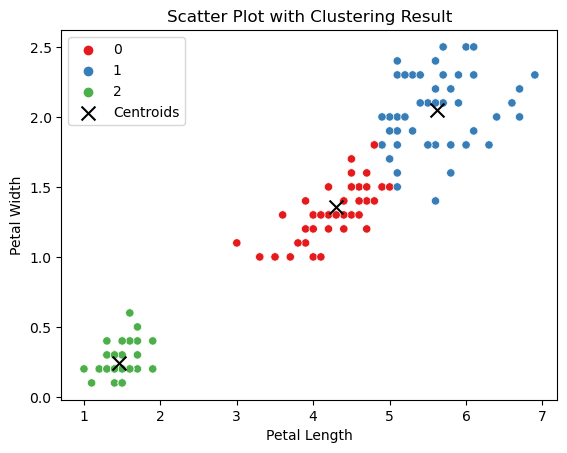

(None,
      Actual Species  Predicted Cluster
 0                 0                  0
 1                 0                  0
 2                 0                  0
 3                 0                  0
 4                 0                  0
 ..              ...                ...
 145               2                  1
 146               2                  1
 147               2                  1
 148               2                  1
 149               2                  1
 
 [150 rows x 2 columns])

In [6]:



def initialize_centroids(data, k):
    
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[indices]
    return centroids

def assign_clusters(data, centroids):
    
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    return labels

def update_centroids(data, labels, k):
    
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids


def kmeans(data, k, num_iterations):
    
    centroids = initialize_centroids(data, k)

    
    for _ in range(num_iterations):
        
        labels = assign_clusters(data, centroids)

        
        centroids = update_centroids(data, labels, k)

    return labels



X = df[['PetalLengthCm', 'PetalWidthCm']].values


k = 3
num_iterations = 10000
num_iterations_refine = 10000


labels = kmeans(X, k, num_iterations)




df.loc[:, 'Cluster'] = labels


centroids = initialize_centroids(X, k)
centroids = update_centroids(X, labels, k)  
labels_refined = kmeans(X, k, num_iterations_refine) 


df['Cluster'] = labels_refined


label_mapping = {0: 2, 1: 1, 2: 0}


df['Cluster'] = df['Cluster'].map(label_mapping)



evaluation_df = pd.DataFrame({'Actual Species': y, 'Predicted Cluster': labels_refined})


sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', data=df, palette='Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', s=100, label='Centroids')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot with Clustering Result')
plt.legend()
plt.show(), evaluation_df
